In [1]:
import matplotlib.pyplot as plt #Python library for visualization(graphs, charts etc)
import pandas as pd #Python library for data analysis
import numpy as np #Python library for array manipulation
import seaborn as sns #Python library based on matplot for beautiful visualizations
sns.set() #Sets all graphs to have a darkgrid theme
from scipy.stats import truncnorm #helps with generating values for truncated normal distribution

In [2]:
"""
Kalman Filter
"""
#Values 
n = 100
initial_estimate = 20
error_measurement = 5
error_estimate = 2
xmin = 25
xmax =30
p = 3

# #Formulas
# kalman_gain = error_estimate / (error_estimate + error_measurement)
# current_estimate = x + (kalman_gain * (measurement - x))
# new_error_estimate = (1 - kalman_gain) * x


In [3]:
#Generate values for the x-axis i.e. Time series
time_series = np.arange(0, 100, 1)

mean = (xmin + xmax) / 2
std = mean - xmin

#The function generates values between the expected range
def get_truncated_normal(mean, sd, low, upp):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

#Generate the measurement values
m_values_range = get_truncated_normal(mean, std, xmin, xmax)

#Generate 100 measurement values
m_values = m_values_range.rvs(n)
m_values

array([29.68052411, 26.44340888, 25.7161564 , 26.04836538, 28.37380712,
       29.42438657, 29.05038091, 29.70801234, 29.16256173, 27.44619707,
       25.59427908, 26.80170922, 25.79469295, 27.92923952, 28.12231329,
       26.53816726, 28.6103653 , 25.80888889, 29.43567267, 26.98681177,
       27.39436182, 28.56406965, 26.03447556, 27.88897462, 26.85265627,
       28.52992792, 27.96762954, 26.74182395, 29.08622205, 27.35907027,
       26.21346714, 26.21085821, 26.24628158, 27.05533318, 29.23863652,
       28.54586129, 28.96091389, 25.32134265, 27.64920458, 26.92604659,
       26.22639483, 29.20295627, 25.34236404, 28.92967749, 28.62207587,
       28.61916587, 29.58733061, 26.8936308 , 28.70829789, 27.68486754,
       25.54651796, 26.46667014, 26.83769074, 27.82499539, 25.77600381,
       26.10481651, 28.02302501, 27.54581361, 27.9021332 , 27.56197599,
       26.58986542, 25.74579839, 29.07273145, 28.24860128, 28.86331982,
       28.07524421, 28.11112505, 27.33375029, 26.57960419, 29.47

In [4]:
#list with all the KG values
KG_list = []
#list with all the estimated values
EST_list = []
#list with all the estimate error values
Est_list = []

#Loop through the measured values to calculate the KG, EST and Est
for i in range(len(m_values)):
    #Calculations for the first measurement value
    if i == 0:
        #KG calculation
        KG = error_estimate / (error_estimate + error_measurement)
        KG_list.append(KG)
        #Estimated value calculation
        EST = initial_estimate + KG * (m_values[i] - initial_estimate)
#         EST_list.append(initial_estimate)
        EST_list.append(EST)
        #Estimate error calculation
        Est = (1 - KG) * error_estimate
        Est_list.append(Est)
    else:
        #KG calculation
        KG = Est_list[i-2] / (Est_list[i-2] + error_measurement)
        KG_list.append(KG)
        #Estimated value calculation
        EST = EST_list[i-2] + KG * (m_values[i] - EST_list[i-2])
        EST_list.append(EST)
        #Estimate error calculation
        Est = (1 - KG) * Est_list[i-2]
        Est_list.append(Est)

EST_list

[22.76586403086546,
 23.583096220133847,
 23.42148455765551,
 24.031326976467724,
 24.32190684226677,
 24.861028452931322,
 25.049364390835404,
 25.507292971223404,
 25.597790702732716,
 25.735399335258034,
 25.59737757109533,
 25.847642480615463,
 25.618147611172596,
 26.04588981739645,
 25.856639581014562,
 26.088696551889964,
 26.09609399169969,
 26.066311938591802,
 26.363260285625554,
 26.134497111286862,
 26.439638177405538,
 26.3020538384213,
 26.411695927609244,
 26.404435824355236,
 26.4401449822381,
 26.5332535269456,
 26.532719803703674,
 26.545171836694106,
 26.678634218043086,
 26.589166346696068,
 26.65349005161182,
 26.569765929204372,
 26.632607565905776,
 26.593452136681783,
 26.75973092931446,
 26.684261864609216,
 26.862111532174744,
 26.623687677339735,
 26.897093445335912,
 26.636554013963828,
 26.868553078842528,
 26.741305126541402,
 26.806259648664906,
 26.827123650735526,
 26.877468127983406,
 26.894747885346174,
 26.97972708970573,
 26.894707263970933,
 27.042

## Task 1 Graph 1

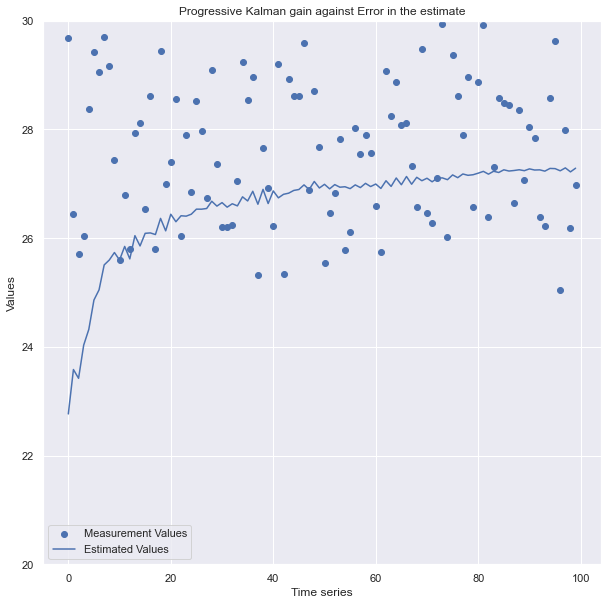

In [5]:
#Set the figure size
plt.figure(figsize=(10,10))

# Add a title to the graph
plt.title('Progressive Kalman gain against Error in the estimate')

# Add labels to the axes
plt.xlabel ('Time series')
plt.ylabel('Values')
#Generate the scatter plot using the measurement values against the time series
plt.scatter(time_series, m_values, label = 'Measurement Values')

#Generate the line graph of the estimated values
plt.plot(time_series, EST_list, label = 'Estimated Values')

#set the range of the x-axis
plt.ylim(20, 30)

#Show legend
plt.legend()

#show the graph
plt.show()

# Task 1 Graph 2

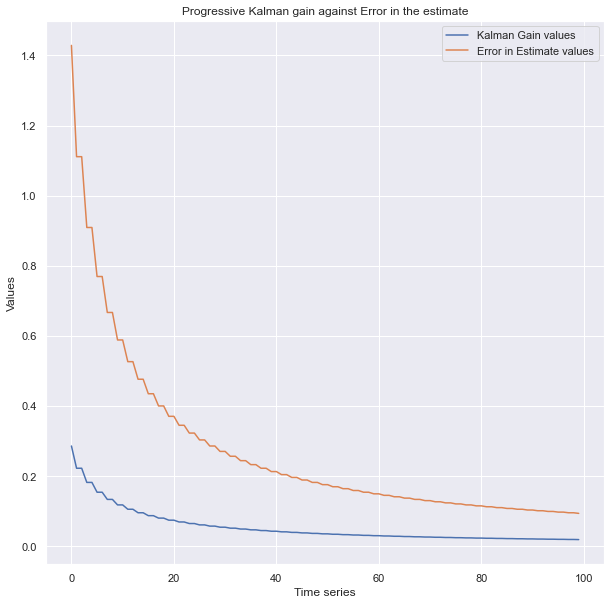

In [6]:
#Set the figure size
plt.figure(figsize=(10,10))

# Add a title to the graph
plt.title('Progressive Kalman gain against Error in the estimate')

# Add labels to the axes
plt.xlabel ('Time series')
plt.ylabel('Values')

#Generate the line graph of the Kalman Gain values
plt.plot(time_series, KG_list, label="Kalman Gain values")

#Generate the line graph of the error in estimate values
plt.plot(time_series, Est_list, label="Error in Estimate values")

# #set the range of the x-axis
# plt.ylim(20, 30)

#Show legend
plt.legend()

#show the graph
plt.show()

# Question 2

In [7]:
#Get the normal distribution measurement values
normal_values = xmin + (xmax - xmin) * np.random.rand(100)
normal_values

array([25.1161447 , 29.22808825, 25.32892769, 28.65472087, 27.37150223,
       29.58037931, 27.98419861, 26.41374652, 25.74462625, 28.13601751,
       25.38095653, 29.33657316, 25.55631669, 25.994444  , 27.55019765,
       29.45691723, 28.92762724, 28.85348687, 25.18032752, 28.93449196,
       27.5647794 , 26.26566075, 28.72424963, 29.21827606, 28.31555095,
       27.3900004 , 28.12972756, 28.52969413, 26.77020695, 26.79546734,
       26.99637396, 28.29368643, 27.21115951, 25.61219401, 28.00982152,
       25.68503592, 26.15223384, 28.49871283, 26.43556793, 27.69734122,
       26.47855744, 28.75477527, 28.85819759, 29.28846544, 26.17847098,
       25.20444013, 29.52841946, 25.17038043, 26.02349034, 29.89657892,
       28.74722436, 25.56159893, 28.2664249 , 28.76278836, 28.75043163,
       28.33440297, 27.09423593, 27.21140705, 25.68379393, 27.29355839,
       29.1151953 , 29.90673999, 26.58320713, 29.24971634, 28.85472562,
       28.1225423 , 25.09194949, 25.20349126, 28.82873393, 28.44

In [8]:


#list with all the KG values
KG1_list = []
#list with all the estimated values
EST1_list = []
#list with all the estimate error values
Est1_list = []

#Loop through the measured values to calculate the KG, EST and Est
for i in range(len(normal_values)):
    #Calculations for the first measurement value
    if i == 0:
        #KG calculation
        KG1 = error_estimate / (error_estimate + error_measurement)
        KG1_list.append(KG1)
        #Estimated value calculation
        EST1 = initial_estimate + KG1 * (normal_values[i] - initial_estimate)
#       EST_list.append(initial_estimate)
        EST1_list.append(EST1)
        #Estimate error calculation
        Est1 = (1 - KG1) * error_estimate
        Est1_list.append(Est1)
    else:
        #KG calculation
        KG1 = Est1_list[i-2] / (Est1_list[i-2] + error_measurement)
        KG1_list.append(KG1)
        #Estimated value calculation
        EST1 = EST1_list[i-2] + KG1 * (normal_values[i] - EST1_list[i-2])
        EST1_list.append(EST1)
        #Estimate error calculation
        Est1 = (1 - KG1) * Est1_list[i-2]
        Est1_list.append(Est1)

EST1_list

[21.46175562861938,
 23.187607321567782,
 22.32112719848391,
 24.181627966685202,
 23.239377203340243,
 25.01220509596793,
 23.96934972699593,
 25.199077286453534,
 24.206053262797504,
 25.544599666046764,
 24.344277176961,
 25.943754770765743,
 24.47186028362966,
 25.948582316788016,
 24.7650352706191,
 26.25365491821111,
 25.126999789719164,
 26.461641473966683,
 25.13126600837445,
 26.644815584386237,
 25.311526259867946,
 26.61866697482935,
 25.546886492365385,
 26.78638368968137,
 25.725510005476988,
 26.822966520765064,
 25.871220160047177,
 26.92049381295047,
 25.922590833652713,
 26.913735624980195,
 25.980633164952494,
 26.98450233307625,
 26.04373708019888,
 26.917560463569078,
 26.139643638360464,
 26.860233740731516,
 26.140229229316283,
 26.933055033775354,
 26.153355393997415,
 26.96557785034444,
 26.167193779023265,
 27.038606316313416,
 26.27703066908289,
 27.126836085816194,
 26.273165583143346,
 27.054292842187493,
 26.39600535212924,
 26.985786936219373,
 26.38245935

# Question 2 Task 1

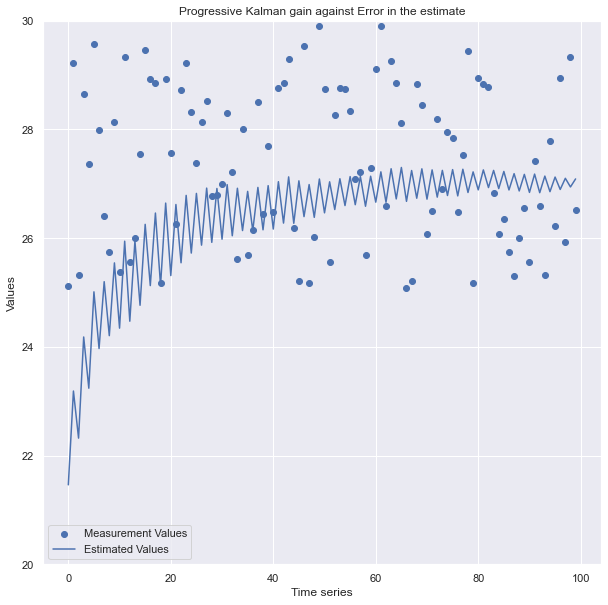

In [9]:
#Set the figure size
plt.figure(figsize=(10,10))

# Add a title to the graph
plt.title('Progressive Kalman gain against Error in the estimate')

# Add labels to the axes
plt.xlabel ('Time series')
plt.ylabel('Values')
#Generate the scatter plot using the measurement values against the time series
plt.scatter(time_series, normal_values, label = 'Measurement Values')

#Generate the line graph of the estimated values
plt.plot(time_series, EST1_list, label = 'Estimated Values')

#set the range of the x-axis
plt.ylim(20, 30)

#Show legend
plt.legend()

#show the graph
plt.show()

# Question 2 Task 2

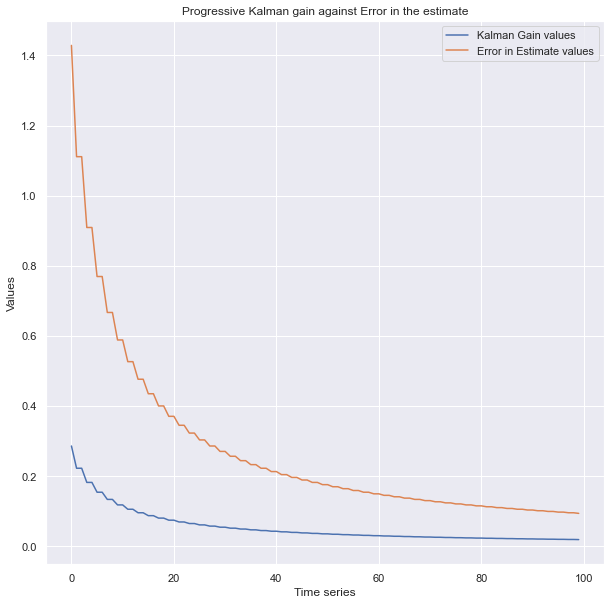

In [10]:
#Set the figure size
plt.figure(figsize=(10,10))

# Add a title to the graph
plt.title('Progressive Kalman gain against Error in the estimate')

# Add labels to the axes
plt.xlabel ('Time series')
plt.ylabel('Values')

#Generate the line graph of the Kalman Gain values
plt.plot(time_series, KG1_list, label="Kalman Gain values")

#Generate the line graph of the error in estimate values
plt.plot(time_series, Est1_list, label="Error in Estimate values")

# #set the range of the x-axis
# plt.ylim(20, 30)

#Show legend
plt.legend()

#show the graph
plt.show()

# Task 2

In [11]:
#Generate values for the x-axis i.e. Time series
time_series = np.arange(1, 2*3.14, 3.14/100)

#Generate the true output
y_output = []

for i in time_series:
    y = 2 + 2 * np.sin(i)
    y_output.append(y)

#Generate the noise values
noise_values = np.random.normal(0, 1, len(y_output))

#get the noisy values
noisy_values = np.add(y_output, noise_values)


In [12]:
initial_estimate = 7
error_measurement = 3
error_estimate = 2

#list with all the KG values
KG2_list = []
#list with all the estimated values
EST2_list = []
#list with all the estimate error values
Est2_list = []

#Loop through the measured values to calculate the KG, EST and Est
for i in range(len(noisy_values)):
    #Calculations for the first measurement value
    if i == 0:
        #KG calculation
        KG2 = error_estimate / (error_estimate + error_measurement)
        KG2_list.append(KG2)
        #Estimated value calculation
        EST2 = initial_estimate + KG2 * (noisy_values[i] - initial_estimate)
        EST2_list.append(EST2)
        #Estimate error calculation
        Est2 = (1 - KG2) * error_estimate
        Est2_list.append(Est2)
    else:
        #KG calculation
        KG2 = Est2_list[i-2] / (Est2_list[i-2] + error_measurement)
        KG2_list.append(KG2)
        #Estimated value calculation
        EST2 = EST2_list[i-2] + KG2 * (noisy_values[i] - EST2_list[i-2])
        EST2_list.append(EST2)
        #Estimate error calculation
        Est2 = (1 - KG2) * Est2_list[i-2]
        Est2_list.append(Est2)


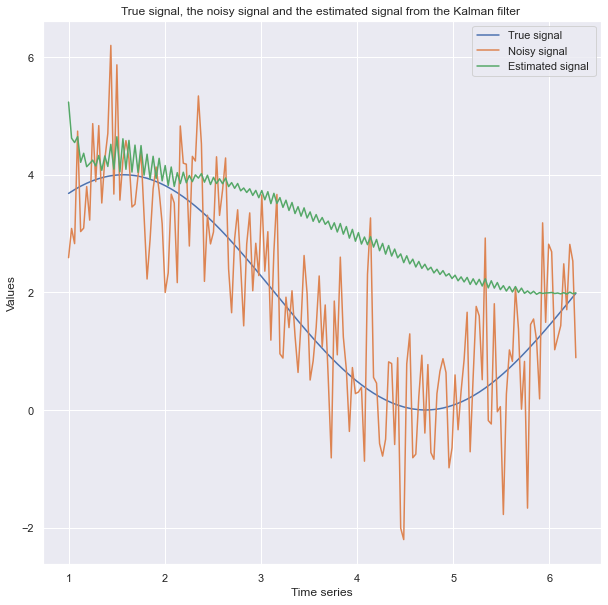

In [13]:
#Set the figure size
plt.figure(figsize=(10,10))

# Add a title to the graph
plt.title('True signal, the noisy signal and the estimated signal from the Kalman filter ')

# Add labels to the axes
plt.xlabel ('Time series')
plt.ylabel('Values')

#Generate the line graph of the Kalman Gain values
plt.plot(time_series, y_output, label="True signal")

#Generate the line graph of the error in estimate values
plt.plot(time_series, noisy_values, label="Noisy signal")

#Generate the line graph of the error in estimate values
plt.plot(time_series, EST2_list, label="Estimated signal ")

# #set the range of the x-axis
# plt.ylim(20, 30)

#Show legend
plt.legend()

#show the graph
plt.show()